# Animal Image Classification using CNN


This notebook demonstrates how to build a Convolutional Neural Network (CNN) to classify animal images. The dataset, containing 10 animal categories, is sourced from Kaggle (Animals10 dataset).

The dataset consist of about 28K medium quality animal images belonging to 10 categories: dog, cat, horse, spyder, butterfly, chicken, sheep, cow, squirrel, elephant.


### Objectives:
- Download data from Kaggle
- Preprocess and prepare image data
- Build and train a CNN model using TensorFlow/Keras
- Evaluate and visualize performance
- Analyze misclassified samples

This serves as a complete image classification pipeline using deep learning.


In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [2]:
#!pip install torch torchvision


Download the DataSet from Kaggle.

In [3]:
!kaggle datasets download -d alessiocorrado99/animals10 -p ./raw-img --unzip

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/cli.py", line 68, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 1741, in dataset_download_cli
    with self.build_kaggle_client() as kaggle:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 688, in build_kaggle_client
    username=self.config_values['username'],
             ~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
KeyError: 'username'


In [4]:
dataset_name = 'alessiocorrado99/animals10'
zip_name = dataset_name.split('/')[-1]
!kaggle datasets download -d {dataset_name}
!unzip -q ./{zip_name} -d ~/Dataset

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/cli.py", line 68, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 1741, in dataset_download_cli
    with self.build_kaggle_client() as kaggle:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 688, in build_kaggle_client
    username=self.config_values['username'],
             ~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
KeyError: 'username'
unzip:  cannot find or open ./animals10, ./animals10.zip or ./animals10.ZIP.


Importing the DataSet and performing first transformation steps.

In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("alessiocorrado99/animals10")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/animals10


In [6]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])
dataset = datasets.ImageFolder("/kaggle/input/animals10", transform=transform)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

In [7]:
from torchvision.datasets import ImageFolder
from torchvision import transforms

transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

dataset = ImageFolder('/kaggle/input/animals10/raw-img', transform=transform)

In [8]:
from torch.utils.data import random_split

train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size

train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

In [9]:
from torch.utils.data import DataLoader

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)

Plotting the Data we are working with.

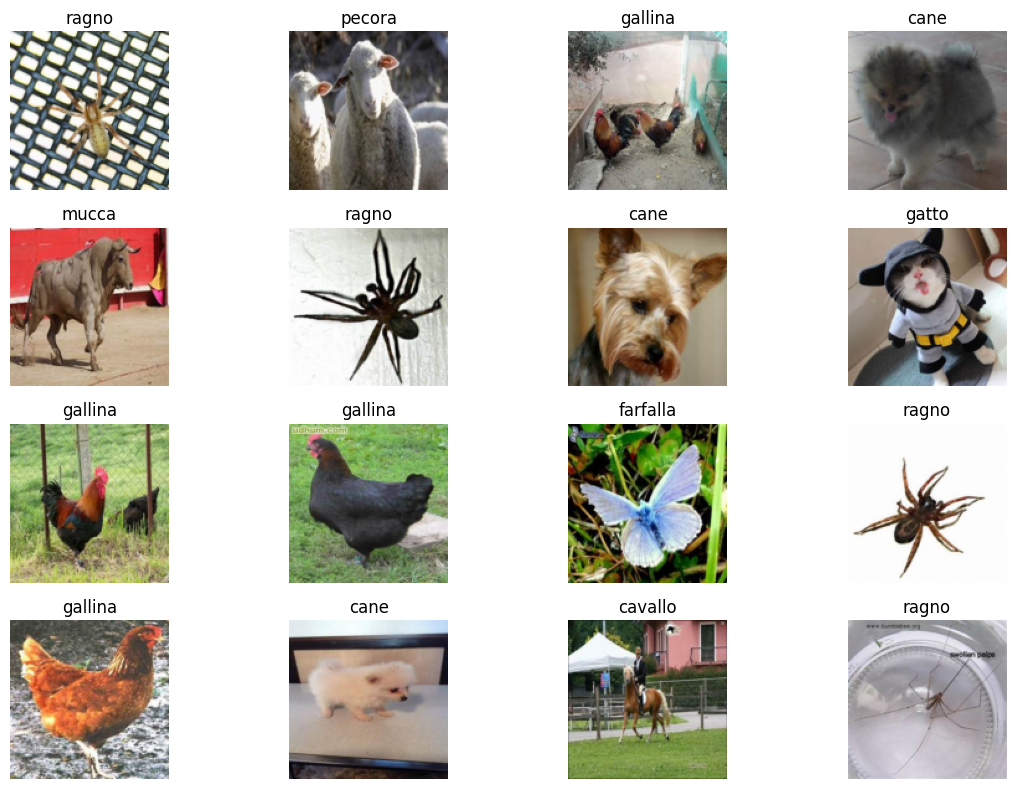

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision

# Get class names
class_names = dataset.classes

# Create a DataLoader (just for visualization)
data_loader = DataLoader(dataset, batch_size=16, shuffle=True)

# Get one batch
images, labels = next(iter(data_loader))

# Convert tensors to NumPy and plot
plt.figure(figsize=(12, 8))
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    img = images[i].permute(1, 2, 0).numpy()  # CxHxW → HxWxC
    plt.imshow(img)
    plt.title(class_names[labels[i]])
    plt.axis("off")

plt.tight_layout()
plt.show()


In [11]:
import os

class_map = {
    "cane": "dog", "cavallo": "horse", "elefante": "elephant",
    "farfalla": "butterfly", "gallina": "chicken", "gatto": "cat",
    "mucca": "cow", "pecora": "sheep", "scoiattolo": "squirrel"
}

# After loading dataset
class_names = [class_map.get(cls, cls) for cls in dataset.classes]
print(class_names)

['dog', 'horse', 'elephant', 'butterfly', 'chicken', 'cat', 'cow', 'sheep', 'ragno', 'squirrel']


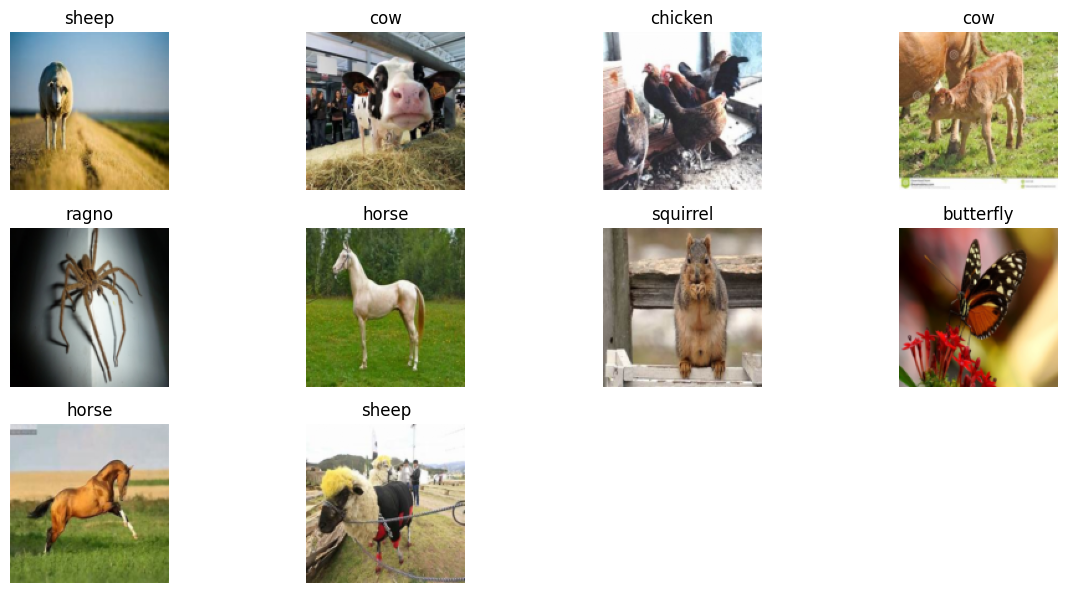

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader

# Translation dictionary: Italian → English
translate = {
    "cane": "dog", "cavallo": "horse", "elefante": "elephant",
    "farfalla": "butterfly", "gallina": "chicken", "gatto": "cat",
    "mucca": "cow", "pecora": "sheep", "scoiattolo": "squirrel"
}

# Get class names and map to English
class_names = [translate.get(name, name) for name in dataset.classes]

dataset.classes = class_names
# Create a DataLoader (just for visualization)
data_loader = DataLoader(dataset, batch_size=16, shuffle=True)

# Get one batch
images, labels = next(iter(data_loader))

# Plot images with English class names
plt.figure(figsize=(12, 8))
for i in range(10):
    ax = plt.subplot(4, 4, i + 1)
    img = images[i].permute(1, 2, 0).numpy()
    plt.imshow(img)
    plt.title(class_names[labels[i]])
    plt.axis("off")

plt.tight_layout()
plt.show()


Splitting and categorising the Data.

In [13]:
from torch.utils.data import random_split

# 80% train, 20% test
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_ds, test_ds = random_split(dataset, [train_size, test_size])

In [14]:
from torch.utils.data import DataLoader

train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
test_loader = DataLoader(test_ds, batch_size=32, shuffle=False)

In [15]:
from torchvision import transforms

transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize to [-1, 1]
])

Checkpoint

In [16]:


#from tensorflow.keras.utils import to_categorical

#y_train = to_categorical(y_train, num_classes=10)
#y_test = to_categorical(y_test, num_classes=10)

#print(y_train.shape)
#print(y_test.shape)




Creating the First Model.

In [17]:
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD
from keras.backend import clear_session

# Force TensorFlow to use CPU only
# This often resolves GPU initialization issues
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

# Or alternatively, limit GPU memory growth
# gpus = tf.config.experimental.list_physical_devices('GPU')
# if gpus:
#     try:
#         for gpu in gpus:
#             tf.config.experimental.set_memory_growth(gpu, True)
#     except RuntimeError as e:
#         print(e)

# Clear any previous Keras session
clear_session()
tf.keras.backend.clear_session()

# Set your dataset path
dataset_path = "/kaggle/input/animals10/raw-img"

# Image parameters
img_size = (28, 28)
batch_size = 128

# Load dataset from folders
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    labels='inferred',
    label_mode='int',
    image_size=img_size,
    batch_size=None,
    shuffle=True
)

# Convert to NumPy arrays
x = []
y = []
for img, label in dataset:
    x.append(img.numpy())
    y.append(label.numpy())

x = np.array(x)
y = np.array(y)
print("x shape:", x.shape)
print("y shape:", y.shape)

# Normalize pixel values
x = x / 255.0

# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)
print("Train:", x_train.shape, y_train.shape)
print("Test:", x_test.shape, y_test.shape)

# One-hot encode the labels
y_train_onehot = to_categorical(y_train, 10)
y_test_onehot = to_categorical(y_test, 10)
print("One-hot train label shape:", y_train_onehot.shape)
print("One-hot test label shape:", y_test_onehot.shape)


Found 26179 files belonging to 10 classes.
x shape: (26179, 28, 28, 3)
y shape: (26179,)
Train: (20943, 28, 28, 3) (20943,)
Test: (5236, 28, 28, 3) (5236,)
One-hot train label shape: (20943, 10)
One-hot test label shape: (5236, 10)


In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout

model = Sequential([
    #Layer 1
    Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    #Layer 2
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(64, activation='relu'),  # Reduced from 128
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile model, changed optimizer to adam
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Print model summary
model.summary()

history = model.fit(
    x_train, y_train_onehot,
    epochs=50,
    batch_size=32,
    validation_data=(x_test, y_test_onehot),
    verbose=1
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 26, 26, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 11, 11, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       204,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 281,930 (1.08 MB)

 Trainable params: 281,546 (1.07 MB)

 Non-trainable params: 384 (1.50 KB)

Epoch 1/50
250/655 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.1814 - loss: 2.4838

KeyboardInterrupt: 

In [22]:
from tensorflow.keras.utils import to_categorical

num_classes = len(np.unique(y))
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)


<-decreasing the layers increases the overfitting.

After trial and error figuring our that a 3 Layer Model with 32Filters at first, then doubling the count will create best accuracy scores.

In [52]:
    from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout

model = Sequential([
    #Layer 1
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    #Layer 2
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

     #Layer 3
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),


    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile model, changed optimizer to adam
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Print model summary
model.summary()

history = model.fit(
    x_train, y_train_onehot,
    epochs=25,
    batch_size=128,
    validation_data=(x_test, y_test_onehot),
    verbose=1
)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 26, 26, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 11, 11, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 3, 3, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 243,018 (949.29 KB)

 Trainable params: 242,570 (947.54 KB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/25
164/164 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - accuracy: 0.2792 - loss: 2.4123 - val_accuracy: 0.1960 - val_loss: 2.7264
Epoch 2/25
164/164 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - accuracy: 0.4528 - loss: 1.5959 - val_accuracy: 0.2708 - val_loss: 2.4191
Epoch 3/25
164/164 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - accuracy: 0.5257 - loss: 1.3883 - val_accuracy: 0.4047 - val_loss: 1.8554
Epoch 4/25
164/164 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - accuracy: 0.5809 - loss: 1.2345 - val_accuracy: 0.4948 - val_loss: 1.4700
Epoch 5/25
164/164 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - accuracy: 0.6156 - loss: 1.1367 - val_accuracy: 0.5636 - val_loss: 1.3026
Epoch 6/25
164/164 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - accuracy: 0.6365 - loss: 1.0477 - val_accuracy: 0.5760 - val_loss: 1.2726
Epoch 7/25
164/164 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - accuracy: 0.6758 - loss: 0.9465 - val_accuracy: 0.5508 - val_loss: 1.3860
Epoch 8/25
164/164 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - accuracy: 0.6940 - loss: 0.8798 - val_acc

<- increassing the layer increases the accuracy yet also extend of overfitting.

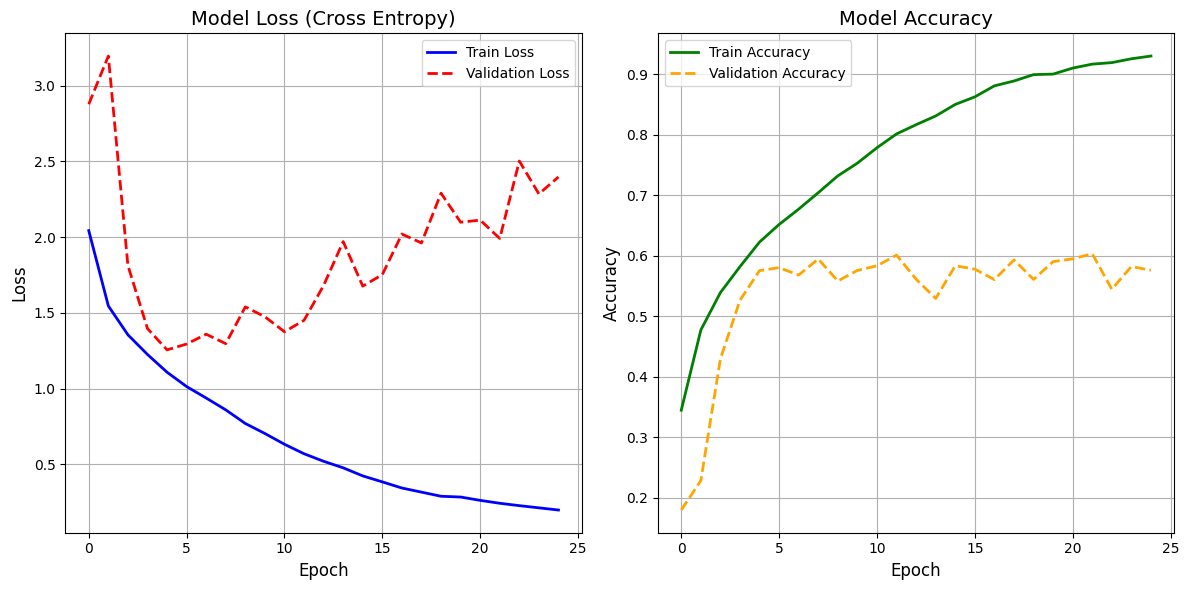

In [20]:
import matplotlib.pyplot as plt

# Set figure size and layout
plt.figure(figsize=(12, 6))

# --- Loss plot ---
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss', color='blue', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', color='red', linestyle='--', linewidth=2)
plt.title('Model Loss (Cross Entropy)', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()
plt.grid(True)

# --- Accuracy plot ---
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy', color='green', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange', linestyle='--', linewidth=2)
plt.title('Model Accuracy', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.grid(True)

# Final layout
plt.tight_layout()
plt.show()

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix_seaborn(model, x_test, y_test_onehot, class_names=None, normalize=False):
    # Predict classes
    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_test_onehot, axis=1)

    # Create confusion matrix
    cm = confusion_matrix(y_true_classes, y_pred_classes)

    # Normalize if needed
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        fmt = '.2f'
        title = 'Normalized Confusion Matrix'
    else:
        fmt = 'd'
        title = 'Confusion Matrix'

    # Default class names
    if class_names is None:
        class_names = [
            "Butterfly", "Cat", "Cow", "Dog", "Elephant",
            "Horse", "Lion", "Sheep", "Spider", "Squirrel"
        ]

    # Plot the heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt=fmt, cmap="Blues",
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(title)
    plt.tight_layout()
    plt.show()

    return cm


164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


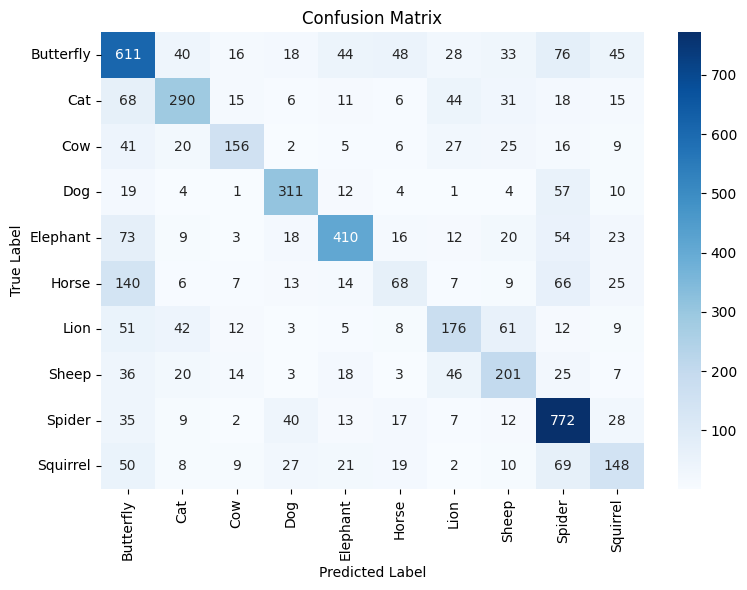

[[611  40  16  18  44  48  28  33  76  45]
 [ 68 290  15   6  11   6  44  31  18  15]
 [ 41  20 156   2   5   6  27  25  16   9]
 [ 19   4   1 311  12   4   1   4  57  10]
 [ 73   9   3  18 410  16  12  20  54  23]
 [140   6   7  13  14  68   7   9  66  25]
 [ 51  42  12   3   5   8 176  61  12   9]
 [ 36  20  14   3  18   3  46 201  25   7]
 [ 35   9   2  40  13  17   7  12 772  28]
 [ 50   8   9  27  21  19   2  10  69 148]]


In [68]:
print(plot_confusion_matrix_seaborn(model, x_test, y_test_onehot, class_names=None, normalize=False))

164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


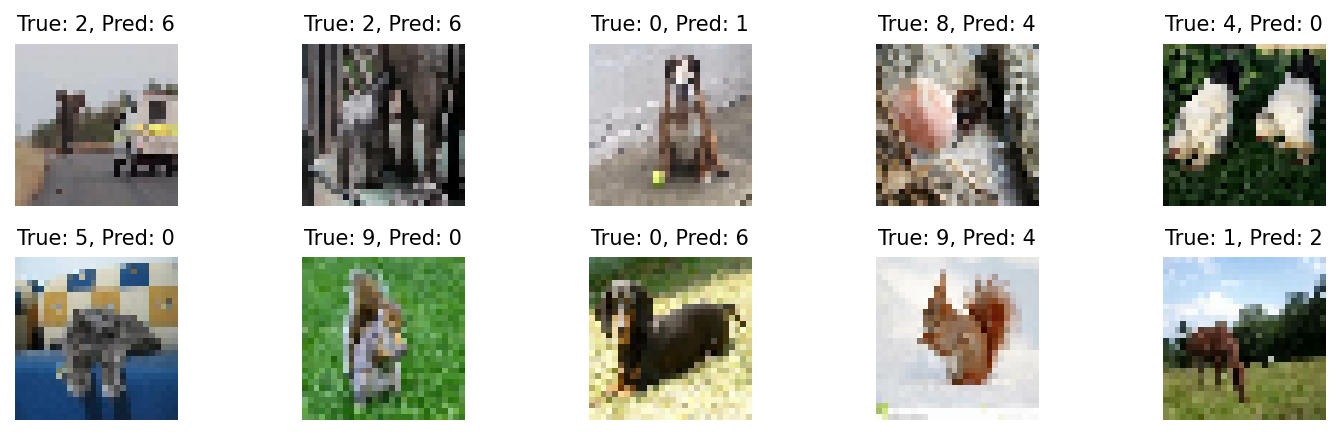

In [50]:
import matplotlib.pyplot as plt
import numpy as np

# Predict and identify misclassified samples
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_cat, axis=1)
misclassified_indices = np.where(y_pred_classes != y_true)[0]

# Plot first 10 misclassified color images clearly
plt.figure(figsize=(10, 3), dpi=150)  # Higher DPI for sharpness

for i, idx in enumerate(misclassified_indices[:10]):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[idx], interpolation='none')  # <– Critical: no blur
    plt.title(f"True: {y_true[idx]}, Pred: {y_pred_classes[idx]}", fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [46]:
from google.colab import files
uploaded = files.upload()

Saving horse.jpg to horse.jpg


In [47]:
import numpy as np
from tensorflow.keras.preprocessing import image # Or use PIL directly

def preprocess_image_from_path(image_path, target_size=(28, 28)):
    """
    Loads an image, resizes it, converts to RGB, and prepares it for model prediction.

    Args:
        image_path (str): Path to the image file.
        target_size (tuple): The (height, width) to resize the image to.
                             Should match your model's input_shape.

    Returns:
        np.array: A preprocessed image array with batch dimension (1, height, width, channels).
    """
    try:
        # Load the image using Keras's image utility
        # This handles opening, resizing, and converting to PIL Image
        img = image.load_img(image_path, target_size=target_size)

        # Convert the PIL Image to a NumPy array
        img_array = image.img_to_array(img)

        # Ensure it's 3 channels (RGB) even if the original was grayscale
        # If the model expects 3 channels, but image_to_array gave 1 for grayscale,
        # you need to explicitly convert. Keras load_img usually handles this.
        # But if you're loading with OpenCV or PIL directly, you might need:
        if img_array.shape[-1] == 1: # If it's grayscale (H, W, 1)
            img_array = np.stack([img_array[:,:,0], img_array[:,:,0], img_array[:,:,0]], axis=-1)
            # A more robust way using tensorflow.image
            # img_array = tf.image.grayscale_to_rgb(tf.convert_to_tensor(img_array))


        # Add the batch dimension: (height, width, channels) -> (1, height, width, channels)
        img_array = np.expand_dims(img_array, axis=0)

        # Normalize pixel values to be between 0 and 1 (if your model was trained that way)
        # Your ImageDataGenerator had rescale=1./255, so it's crucial here too.
        img_array = img_array / 255.0

        return img_array

    except Exception as e:
        print(f"Error processing image {image_path}: {e}")
        return None

# --- Usage Example ---
# Assuming 'wolf-spider.jpg' is in the correct directory
img_array = preprocess_image_from_path('wolf-spider.jpg', target_size=(28, 28))

if img_array is not None:
    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction, axis=1)[0]
    # Assuming 'class_names' is defined somewhere with your class labels
    print("Predicted class:", class_names[predicted_class_index])
else:
    print("Image preprocessing failed.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted class: ragno


In [48]:
img_array = preprocess_image_from_path('horse.jpg')
prediction = model.predict(img_array)
predicted_class_index = np.argmax(prediction, axis=1)[0]
print("Predicted class:", class_names[predicted_class_index])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted class: horse
